<a href="https://colab.research.google.com/github/RonaldBH/Ruben-Ronald-Bautista-Huillca/blob/main/ProyectoFinal_AprendizajeAutomatico_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto de Aprendizaje Automático**
# <font color=green>**Predicción de precios inmobiliarios en la provincia de Lima - Perú**</font>
###### https://www.bcrp.gob.pe/estadisticas/indicador-de-precios-de-venta-de-departamentos.html
####**INTEGRANTE:**
##### - BAUTISTA HUILLCA, Ruben Ronald




> ### Librerías



In [1]:
# importar libreria de Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import NaN
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

# <font color=dark red>**1. Análisis del negocio**</font>  


In [2]:
!wget https://www.dropbox.com/s/3s2ztq6meqo4v8y/DataInmobiliaria.csv

--2023-09-05 23:54:31--  https://www.dropbox.com/s/3s2ztq6meqo4v8y/DataInmobiliaria.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3s2ztq6meqo4v8y/DataInmobiliaria.csv [following]
--2023-09-05 23:54:31--  https://www.dropbox.com/s/raw/3s2ztq6meqo4v8y/DataInmobiliaria.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2dd5e2e98b887c1a92975d946b.dl.dropboxusercontent.com/cd/0/inline/CDJPQn2rJEcBtcLhsrhff-XcYjofdvi4TIQaVuaLye7xfXDUKPLKlgvW5VttNjvp6YFs2BcMToAP4BmbTTAYkmWbkNaWXDACtJ2M9XtI-KhK0zEk9SO10R0vCXK7_pZy_SR7sqLMkp8edrSkGVk0jJFB/file# [following]
--2023-09-05 23:54:32--  https://uc2dd5e2e98b887c1a92975d946b.dl.dropboxusercontent.com/cd/0/inline/CDJPQn2rJEcBtcLhsrhff-XcYjofdvi4TIQaVuaLye7xfXDUKPLKlgvW5VttNjvp6YFs2BcMToAP4B

In [19]:
# leer el archivo de datos con formato .csv y codificado con UTF-8

data = pd.read_csv("DataInmobiliaria.csv", sep=',')
data

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
66665,375607,Lince,65,2,0.0,0.0,0.0,1.0,2.0
66666,319394,Magdalena,86,3,2.0,0.0,0.0,1.0,13.0
66667,127758,Magdalena,52,0,2.0,0.0,0.0,1.0,49.0
66668,224853,Surquillo,69,2,1.0,0.0,0.0,1.0,30.0


In [20]:
print(set(data["Distrito"].tolist()))

{'los Olivos', 'Lince', 'San isidro', 'Chorrillos', 'San Isidro', 'SAN BORJA', 'SURCO', 'SAN ISIDRO', 'lince', 'MIRAFLORES', 'La Perla', 'Surco', 'Breña', 'San miguel', 'pueblo Libre', 'San borja', 'surco', 'Carabayllo', 'Los olivos', 'Pueblo Libre', 'san isidro', 'Magdalena', 'Los Olivos', 'Cercado de Lima', 'La perla', 'breña', 'Miraflores', 'San Borja', 'Pueblo libre', 'Bellavista', 'Barranco', 'LInce', 'Surquillo', 'Jesús María', 'LA MOLINA', 'La Molina', 'San Miguel'}


In [21]:
# Observando los 10 primeros registros
data.head(10)

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
5,273972,San Borja,122,2,1.0,0.0,1.0,0.0,8.0
6,601217,San Borja,261,4,1.0,0.0,1.0,0.0,10.0
7,2226025,San Borja,360,7,1.0,0.0,1.0,0.0,3.0
8,399543,San Borja,140,3,1.0,0.0,1.0,0.0,3.0
9,753424,San Isidro,280,4,1.0,0.0,1.0,0.0,3.0


Predecir el precio de una casa respecto a las sigyuienres variables:


*   Superficie(m²)
*   Numero de habitaciones
*   Numero de baños
*   Numero de garajes

# <font color=dark red>**2. Comprension de datos / Análisis exploratorio de datos**</font>  


In [22]:
# ver la cantidad de registros
data.shape

(66670, 9)

In [23]:
# Observamos la cantidad de registros no nulos y su tipo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66670 entries, 0 to 66669
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio              66670 non-null  int64  
 1   Distrito            66670 non-null  object 
 2   Superficie          66670 non-null  int64  
 3   Habitaciones        66670 non-null  int64  
 4   Baños               66664 non-null  float64
 5   Garajes             65572 non-null  float64
 6   Piso de ubicación   66024 non-null  float64
 7   Vista al exterior   66385 non-null  float64
 8   Años de antigüedad  65236 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 4.6+ MB


([<matplotlib.axis.XTick at 0x7946bbaaea40>,
 [Text(1000, 0, '0.001'),
  Text(1000000, 0, '1.000'),
  Text(2000000, 0, '2.000'),
  Text(3000000, 0, '3.000'),
  Text(4000000, 0, '4.000'),
  Text(5000000, 0, '5.000'),
  Text(6000000, 0, '6.000'),
  Text(7000000, 0, '7.000'),
  Text(8000000, 0, '8.000'),
  Text(9000000, 0, '9.000')])

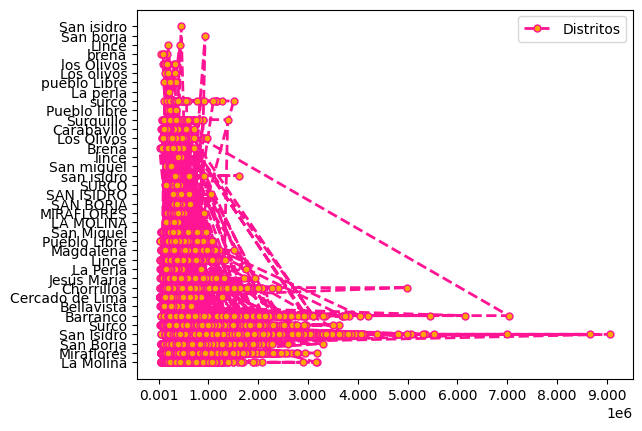

In [24]:
# Observar como está distribuido la data
plt.plot(data['Precio'],data['Distrito'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Distritos')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x79467e4812d0>,
 [Text(1000, 0, '0.001'),
  Text(1000000, 0, '1.000'),
  Text(2000000, 0, '2.000'),
  Text(3000000, 0, '3.000'),
  Text(4000000, 0, '4.000'),
  Text(5000000, 0, '5.000'),
  Text(6000000, 0, '6.000'),
  Text(7000000, 0, '7.000'),
  Text(8000000, 0, '8.000'),
  Text(9000000, 0, '9.000')])

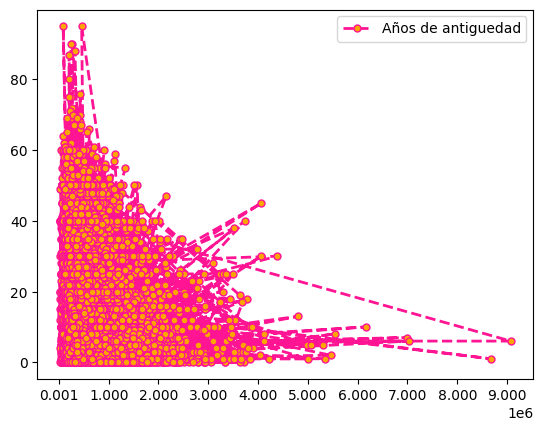

In [25]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Años de antigüedad'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Años de antiguedad')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x79467e4e2dd0>,
 [Text(1000, 0, '0.001'),
  Text(1000000, 0, '1.000'),
  Text(2000000, 0, '2.000'),
  Text(3000000, 0, '3.000'),
  Text(4000000, 0, '4.000'),
  Text(5000000, 0, '5.000'),
  Text(6000000, 0, '6.000'),
  Text(7000000, 0, '7.000'),
  Text(8000000, 0, '8.000'),
  Text(9000000, 0, '9.000')])

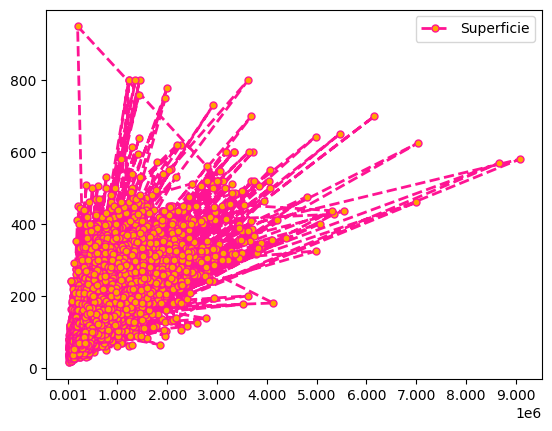

In [27]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Superficie'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Superficie')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

([<matplotlib.axis.XTick at 0x79467e56f310>,
 [Text(1000, 0, '0.001'),
  Text(1000000, 0, '1.000'),
  Text(2000000, 0, '2.000'),
  Text(3000000, 0, '3.000'),
  Text(4000000, 0, '4.000'),
  Text(5000000, 0, '5.000'),
  Text(6000000, 0, '6.000'),
  Text(7000000, 0, '7.000'),
  Text(8000000, 0, '8.000'),
  Text(9000000, 0, '9.000')])

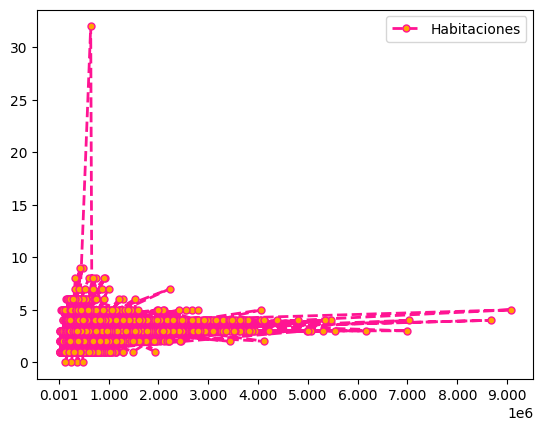

In [28]:
# Observar como esta distribuido la data
plt.plot(data['Precio'],data['Habitaciones'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Habitaciones')
plt.legend(loc="upper right")
plt.xticks([1000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000])

In [29]:
1# Correlación de variables/características
data.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-29-3f4355f4b739>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm')


,Precio,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
Precio,1.000000,0.710131,0.242798,0.414673,0.535158,0.036720,0.131361,0.001042
Superficie,0.710131,1.000000,0.418147,0.360921,0.511336,0.022413,0.108755,0.030666
Habitaciones,0.242798,0.418147,1.000000,0.368533,0.209275,0.016542,0.119117,-0.072228
Baños,0.414673,0.360921,0.368533,1.000000,0.304023,0.041169,0.104856,-0.090874
Garajes,0.535158,0.511336,0.209275,0.304023,1.000000,-0.023259,0.142647,-0.120731
Piso de ubicación,0.036720,0.022413,0.016542,0.041169,-0.023259,1.000000,0.031664,-0.050280
Vista al exterior,0.131361,0.108755,0.119117,0.104856,0.142647,0.031664,1.000000,-0.020553
Años de antigüedad,0.001042,0.030666,-0.072228,-0.090874,-0.120731,-0.050280,-0.020553,1.000000


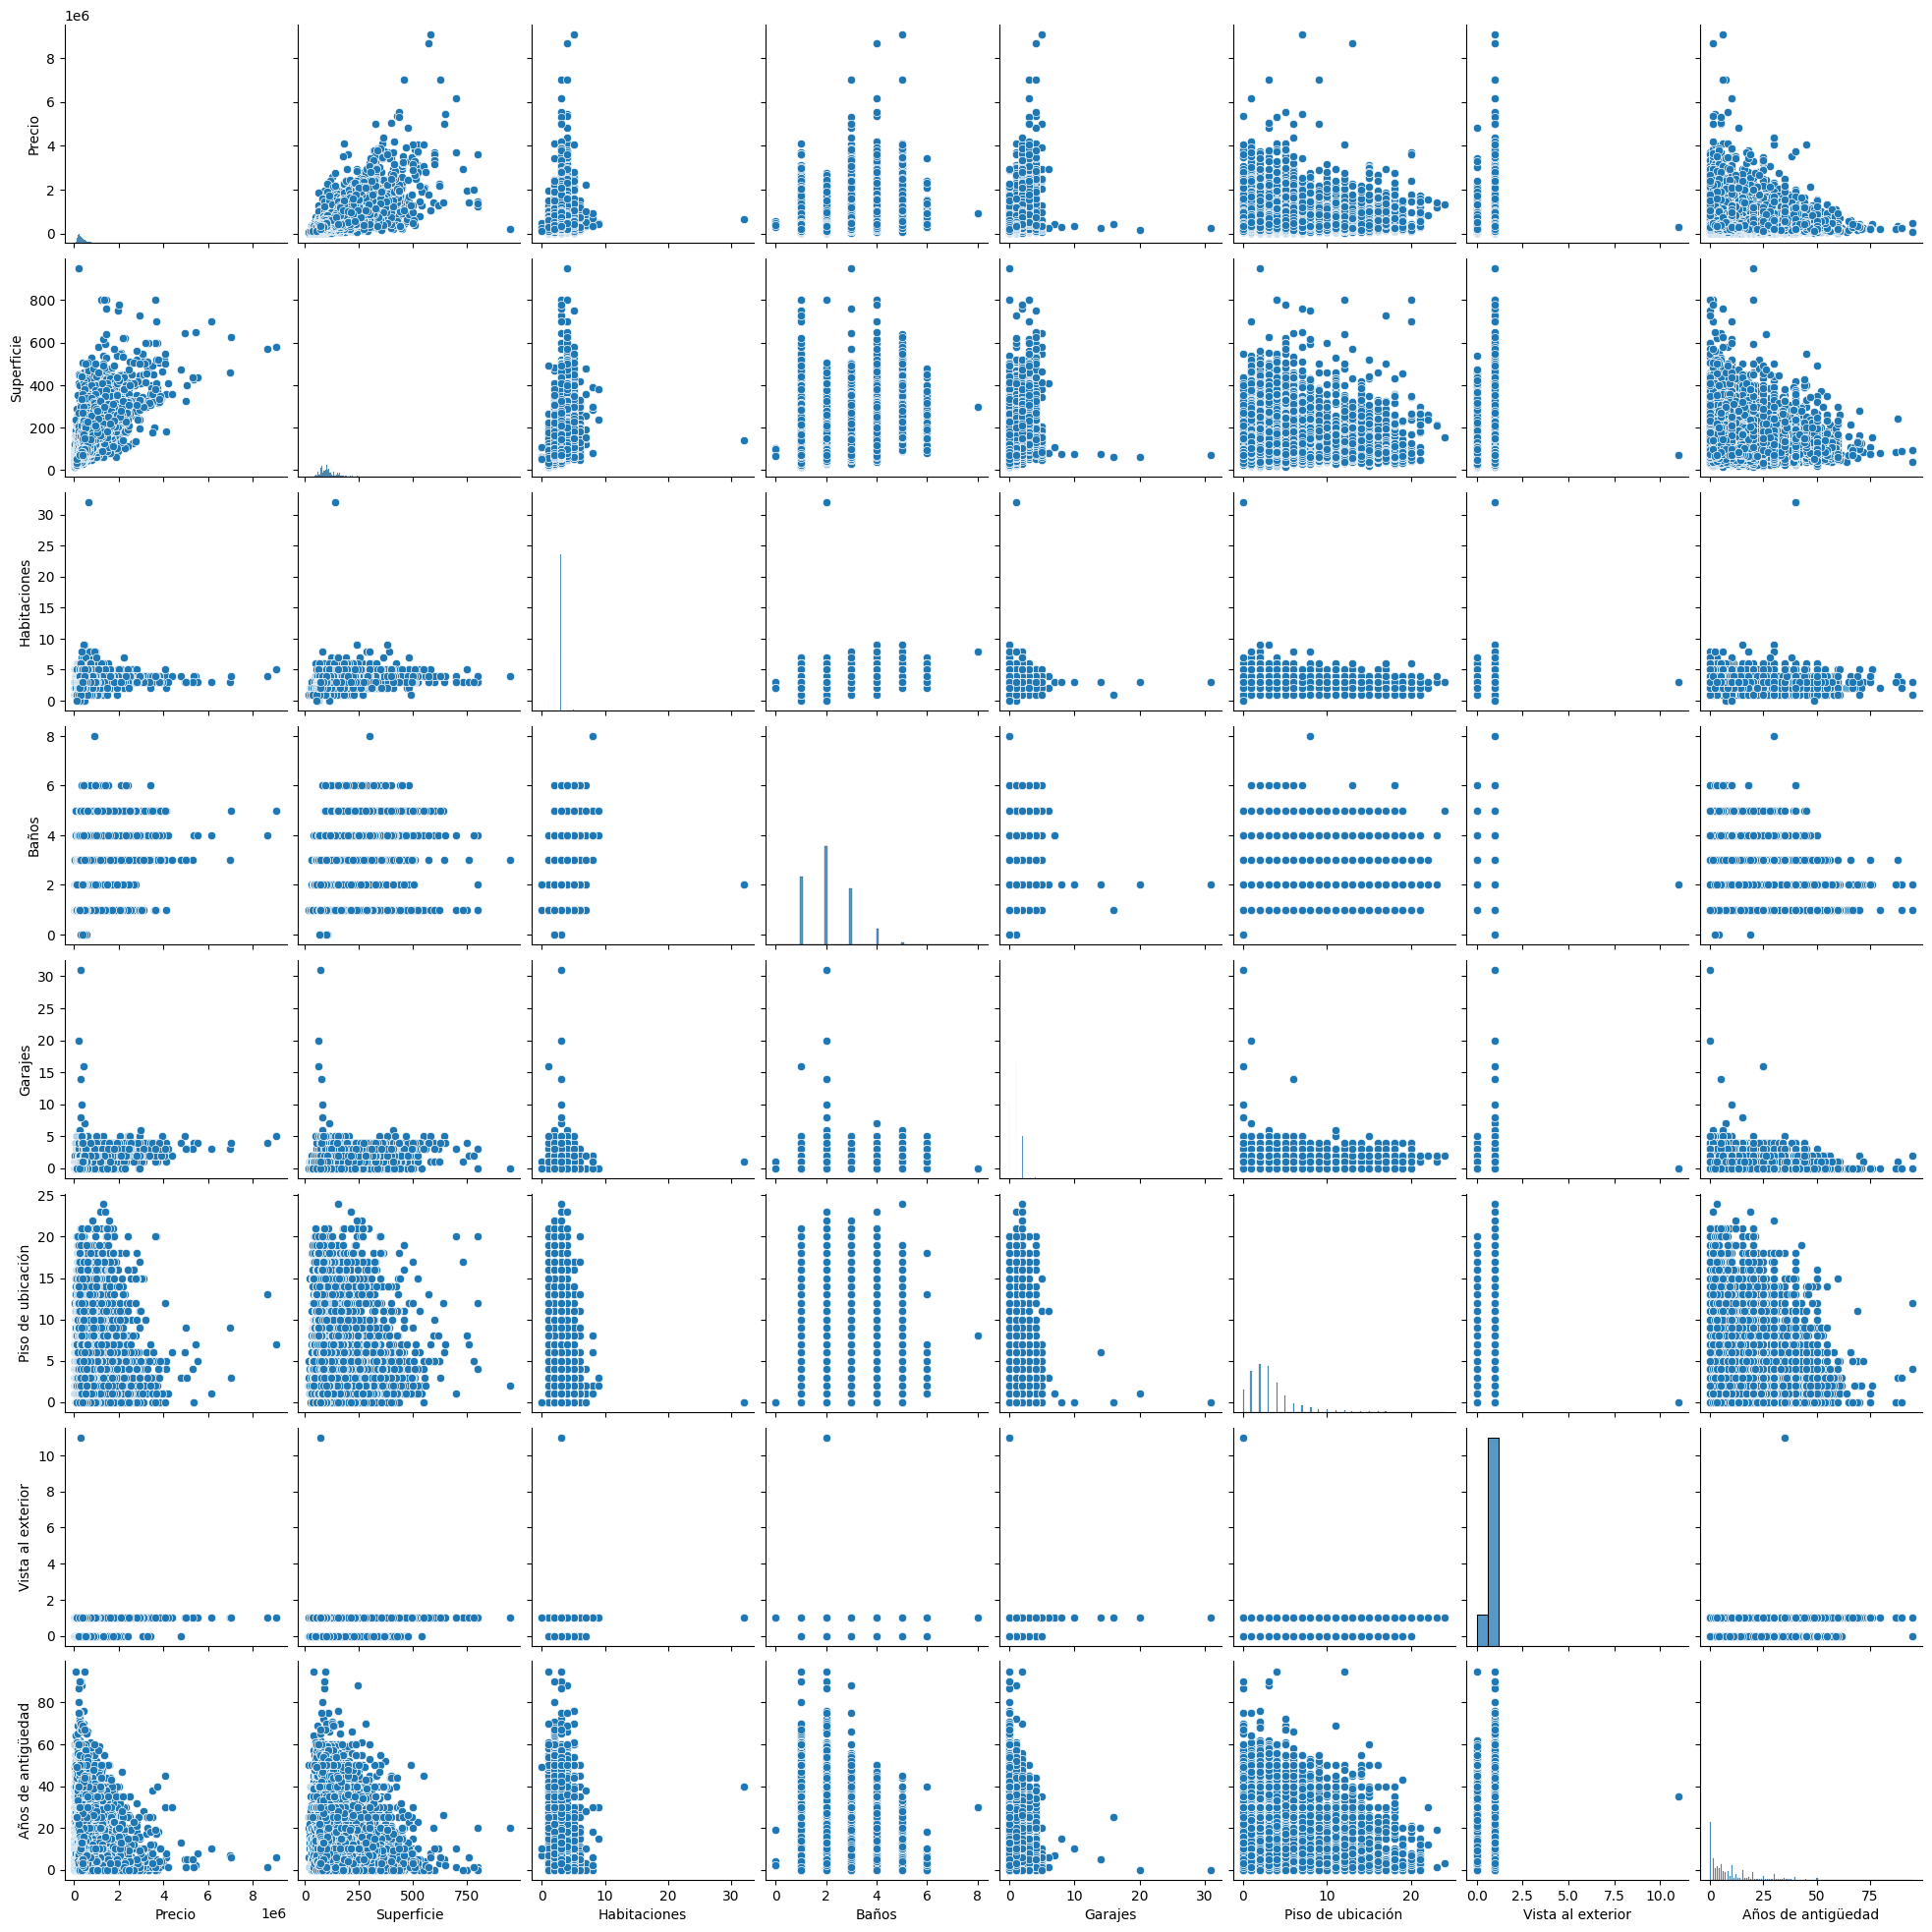

In [30]:
# Diagrama de pares de la data
sns.pairplot(data);

# <font color=dark red>**3. Preprocesamiento de datos**</font>


In [32]:
# Seleccionar los registros que tienen un numero de garajes menor e igual a 5
data = data[data['Garajes'] <= 5]
data = data[data['Habitaciones'] < 31]
data = data[data['Superficie'] < 500]
data = data[data['Años de antigüedad'].notna()]
data = data[data['Garajes'].notna()]
data = data[data['Baños'].notna()]
data

,Precio,Distrito,Superficie,Habitaciones,Baños,Garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,532724,La Molina,155,3,1.0,0.0,2.0,0.0,3.0
1,265601,Miraflores,120,3,1.0,0.0,8.0,0.0,10.0
2,151826,Miraflores,100,3,1.0,0.0,9.0,0.0,0.0
3,399543,Miraflores,150,3,1.0,0.0,4.0,0.0,0.0
4,296803,San Borja,125,3,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
66665,375607,Lince,65,2,0.0,0.0,0.0,1.0,2.0
66666,319394,Magdalena,86,3,2.0,0.0,0.0,1.0,13.0
66667,127758,Magdalena,52,0,2.0,0.0,0.0,1.0,49.0
66668,224853,Surquillo,69,2,1.0,0.0,0.0,1.0,30.0


In [33]:
# ver la cantidad de registros
data.shape

(64378, 9)

In [34]:
# eliminar columnas que no se utilizaran como variables
data = data.drop(columns={'Distrito', 'Piso de ubicación', 'Vista al exterior'})
data = data.sample(n=50000)
data

,Precio,Superficie,Habitaciones,Baños,Garajes,Años de antigüedad
5367,146634,75,2,1.0,1.0,5.0
15305,164004,68,2,2.0,1.0,0.0
27203,274766,150,4,4.0,1.0,0.0
35665,753720,160,3,3.0,2.0,14.0
4680,374628,100,2,1.0,2.0,5.0
...,...,...,...,...,...,...
65383,723401,115,3,2.0,1.0,7.0
22116,166063,80,2,2.0,1.0,0.0
56708,524925,77,2,1.0,0.0,15.0
9572,223170,175,3,2.0,1.0,33.0


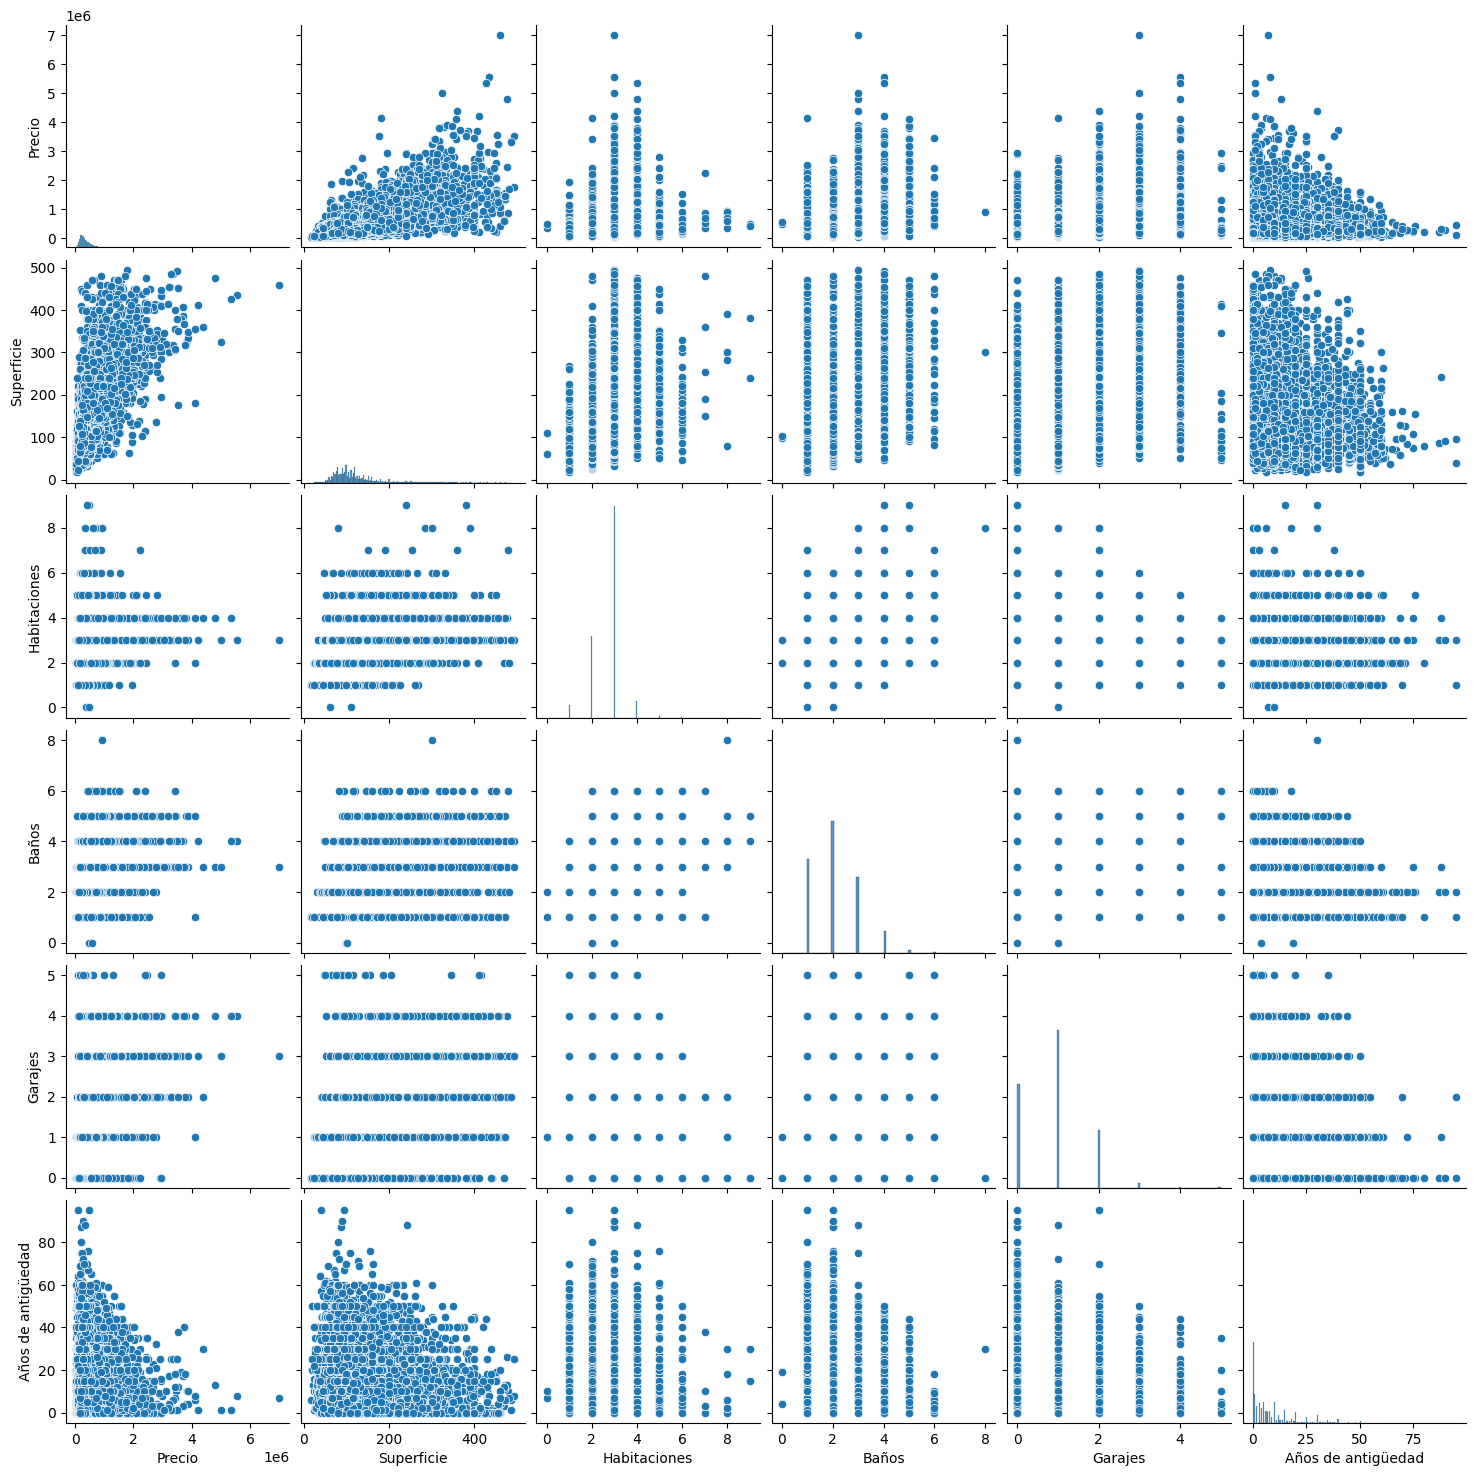

In [35]:
# Grafico de dispersión
sns.pairplot(data);

In [36]:
#imprimimos media de los datos
data.mean()

Precio                396880.49382
Superficie               117.21554
Habitaciones               2.73674
Baños                      2.10364
Garajes                    0.89944
Años de antigüedad         8.15960
dtype: float64

In [37]:
#descripcion general de los datos
DATA=data.describe()
DATA

,Precio,Superficie,Habitaciones,Baños,Garajes,Años de antigüedad
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.968805e+05,117.215540,2.736740,2.103640,0.899440,8.159600
std,3.115418e+05,52.542806,0.646779,0.924162,0.763688,10.433723
min,2.010000e+04,17.000000,0.000000,0.000000,0.000000,0.000000
25%,2.108110e+05,82.000000,2.000000,1.000000,0.000000,1.000000
50%,3.077480e+05,105.000000,3.000000,2.000000,1.000000,5.000000
75%,4.744400e+05,135.000000,3.000000,3.000000,1.000000,11.000000
max,6.998993e+06,494.000000,9.000000,8.000000,5.000000,95.000000


In [38]:
#eliminamos el count para una mejor visualizacion
DATA=DATA.drop(DATA.index[[0,2]])

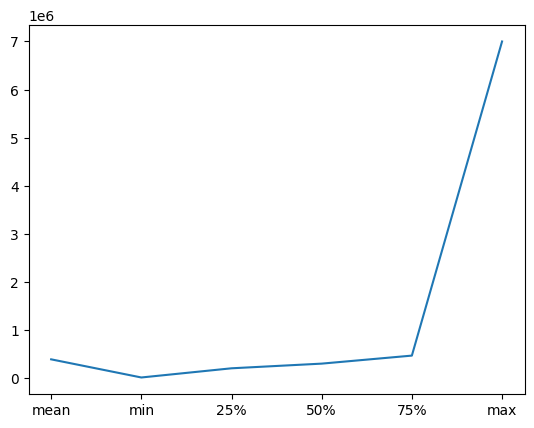

In [39]:
#visualizamos datos del precio
plt.plot(DATA['Precio'])

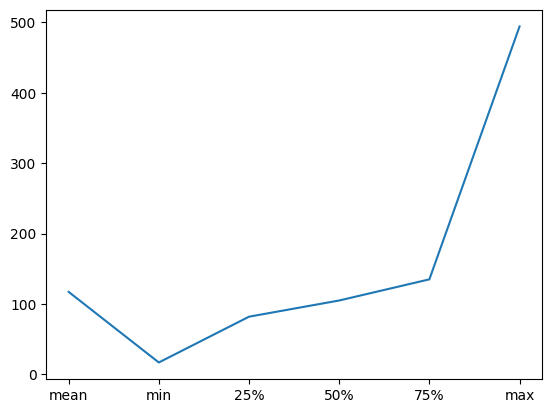

In [41]:
#visualizamos datos de superficie
plt.plot(DATA['Superficie'])

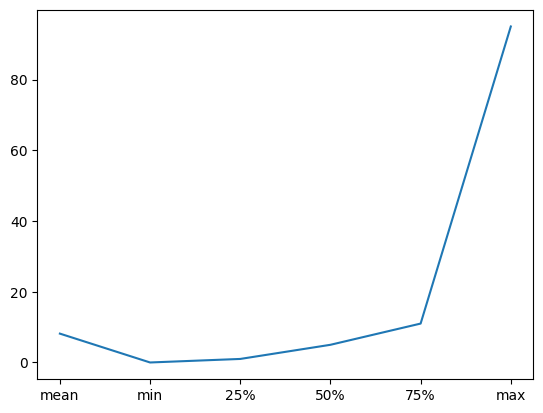

In [42]:
#visualizamos years de antiguedad
plt.plot(DATA['Años de antigüedad'])

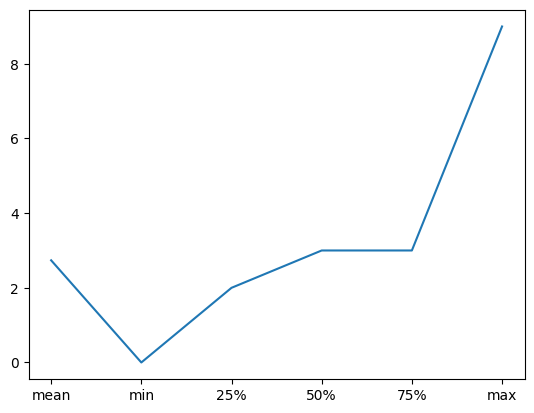

In [43]:
#Visualizamos datos de habitaciones
plt.plot(DATA['Habitaciones'])

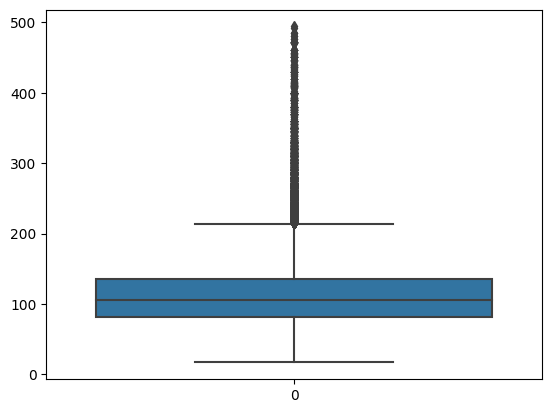

In [45]:
#datos de superficies
sns.boxplot(data['Superficie']);


<Axes: >

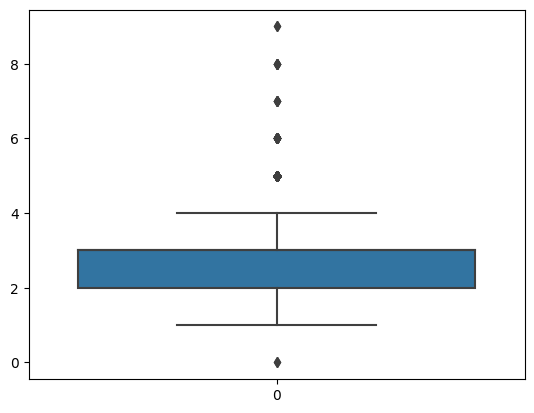

In [46]:
#datos de Habitaciones
sns.boxplot(data['Habitaciones'])

<Axes: >

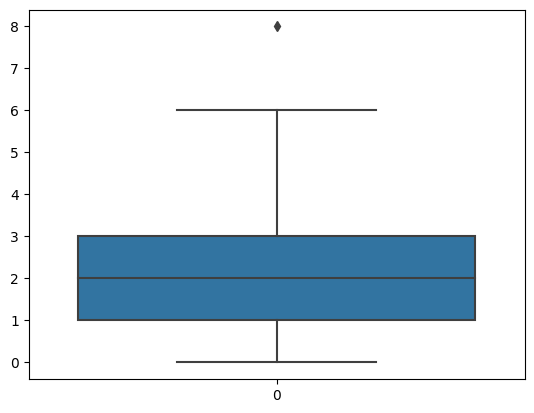

In [47]:
#datos de toilet
sns.boxplot(data['Baños'])


<Axes: >

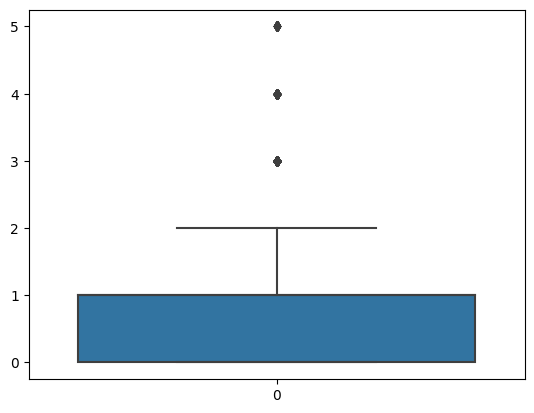

In [48]:
#datos de garaje
sns.boxplot(data['Garajes'])

<Axes: >

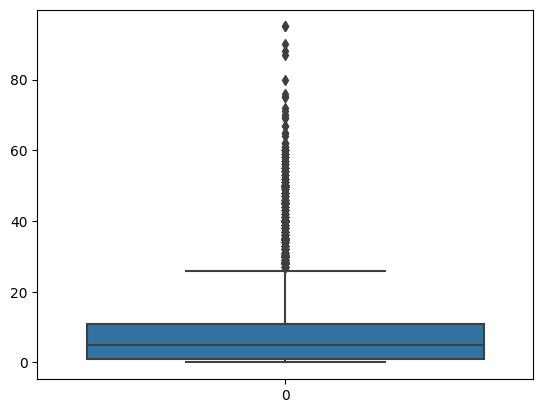

In [49]:
#datos de Años de antigüedad
sns.boxplot(data['Años de antigüedad'])

# <font color=dark red> **4. Modelado **</font>

In [50]:
# Separación de la data
X = data.drop(columns={'Precio'})
y = data['Precio']

In [51]:
# Data train 70% y data test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12);
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# <font color=dark red>**4.1 Modelado por KNN**</font>


In [52]:
# modelos
KnnRegressor = KNeighborsRegressor(n_neighbors=25, weights='distance')
KnnRegressor.fit(X_train,y_train)
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train,y_train)
DecisionRegressor = DecisionTreeRegressor()
DecisionRegressor.fit(X_train,y_train)
y_predKnn = KnnRegressor.predict(X_test)
y_predlinear = LinearRegressor.predict(X_test)
y_predDeci = DecisionRegressor.predict(X_test)

([<matplotlib.axis.XTick at 0x79467b94af20>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(25, 0, '25')])

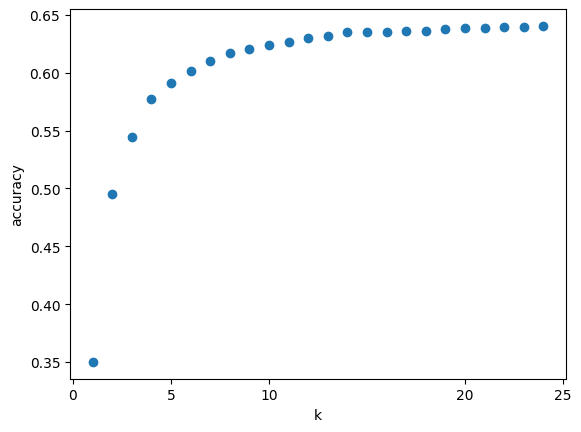

In [53]:
# graficamos un cuadro para saber cuantos vecimos poner en el modelo KnnRegressor
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    del knn
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,20,25])

# <font color=dark red>**4.2 Modelado por Random forest**</font>

In [54]:
from sklearn.ensemble import RandomForestRegressor

modelRndf = RandomForestRegressor(n_estimators=20, random_state=0)
modelRndf.fit(X_train,y_train)

y_predRndf = modelRndf.predict(X_test)

# <font color=dark red>**5. Visualización de datos **</font>


In [55]:
KnnRegressor.fit(X_train, y_train)
KnnRegressor.score(X_test, y_test)

0.6405844129626874

In [56]:
LinearRegressor.fit(X_train, y_train)
LinearRegressor.score(X_test, y_test)

0.5705521034184047

In [57]:
DecisionRegressor.fit(X_train, y_train)
DecisionRegressor.score(X_test, y_test)

0.33407397302081965

In [58]:
modelRndf.fit(X_train, y_train)
modelRndf.score(X_test, y_test)

0.5826651485774973

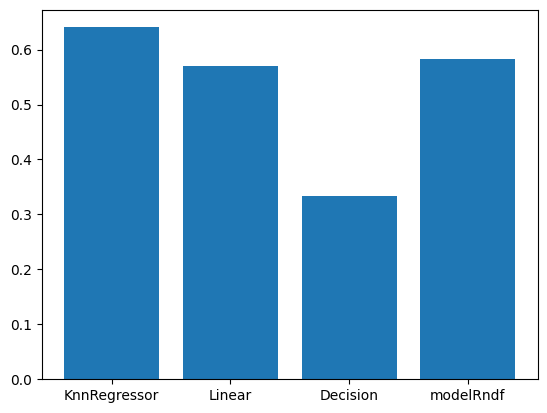

In [59]:
A=KnnRegressor.score(X_test, y_test)
B=LinearRegressor.score(X_test, y_test)
C=DecisionRegressor.score(X_test, y_test)
D=modelRndf.score(X_test, y_test)
x=[1,2,3,4]
y=[A,B,C,D]
plt.bar(x,y)
plt.xticks(x, ["KnnRegressor","Linear","Decision","modelRndf"])
#plt.yticks('KnnRegressor','LinearRegressor','DecisionRegressor','modelRndf')
plt.show()

Pruebas

In [60]:
print(KnnRegressor.predict(X_test))

[815080.62466858 233566.1584247  226009.42252267 ... 331006.38671903
 273312.48409521 743266.69939638]


In [61]:
prueba = [[155,	3, 1.0, 0.0, 3.0],
[120, 3, 1.0, 0.0, 10.0]]
print(KnnRegressor.predict(prueba))

[1929381.98276569 1891095.60362177]


# <font color=dark red>**6. Evaluación / Desempeño de modelos** </font>

---


Utilice metricas para obtener conclusiones y proponer el mejor modelo.

In [62]:
# Predictions
preds = KnnRegressor.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
2795,686905,8.150806e+05,-128175.624669
5347,211325,2.335662e+05,-22241.158425
27138,217065,2.260094e+05,-8944.422523
3498,240881,2.909917e+05,-50110.652434
28250,180620,2.241914e+05,-43571.378804
...,...,...,...
48136,813199,1.176855e+06,-363656.015810
28278,396878,3.198365e+05,77041.517161
5021,254453,3.310064e+05,-76553.386719
18882,175353,2.733125e+05,-97959.484095


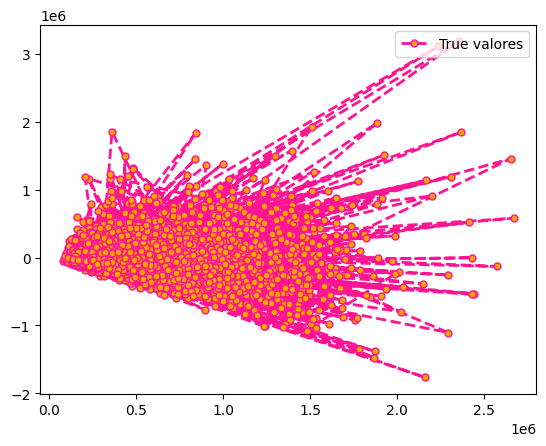

In [63]:
plt.plot(performance['Prediction'],performance['Error'],color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='True valores')
plt.legend(loc="upper right")

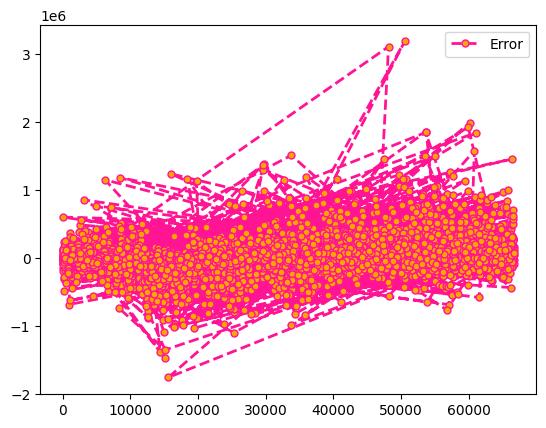

In [64]:
performance['Error'].plot(color='deeppink',linestyle='dashed',linewidth=2,marker='o',markersize=5,markerfacecolor='orange',label='Error')
plt.legend(loc="upper right")

In [65]:
from sklearn import metrics
# Error cuadrado
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predKnn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predKnn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predKnn)))

Mean Absolute Error: 115523.98118362625
Mean Squared Error: 33952611542.607014
Root Mean Squared Error: 184262.3443425352


In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predlinear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predlinear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlinear)))

Mean Absolute Error: 131558.77239592306
Mean Squared Error: 40568295133.26274
Root Mean Squared Error: 201415.72712492623


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDeci))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDeci))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predDeci)))

Mean Absolute Error: 142166.2214700869
Mean Squared Error: 62649012880.0728
Root Mean Squared Error: 250297.8483328868


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRndf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRndf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predRndf)))

Mean Absolute Error: 123485.36426834187
Mean Squared Error: 39424022231.03596
Root Mean Squared Error: 198554.83431796858



# <font color=dark red>**7. Conclusiones** </font>

Puede escribirlos en texto o explicarlos el día de la sustentación.

In [69]:
'''
El análisis y la propuesta de este trabajo constituyen a
 la estimación o aproximación del precio con respecto al
 tamaño de superficie, numero de habitaciones, numero de baños,
 numero de garajes y los años de antiguedad.

 Optamos por los algoritmos de regresión, ya que este no busca
 una relación entre las caracteristicas.

 Con respecto al trabajo nuestro modelo no es óptimo ya que
 con KnnRegressor tuvimos un score de 0.64 que es mayor a los
 de regresión lineal y los arboles de decisión para regresión.
'''

'\nEl análisis y la propuesta de este trabajo constituyen a\n la estimación o aproximación del precio con respecto al\n tamaño de superficie, numero de habitaciones, numero de baños,\n numero de garajes y los años de antiguedad.\n\n Optamos por los algoritmos de regresión, ya que este no busca\n una relación entre las caracteristicas.\n\n Con respecto al trabajo nuestro modelo no es óptimo ya que\n con KnnRegressor tuvimos un score de 0.64 que es mayor a los\n de regresión lineal y los arboles de decisión para regresión.\n'